In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np



# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [19]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [21]:
df_1 = df.drop(columns=["id", "host_id", "host_name"])

In [22]:
df_1 = df_1.drop(columns=["name", "latitude", "longitude"])

In [23]:
print(df_1.columns)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [24]:
df_1.select_dtypes(include=['object', 'category']).columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

In [25]:
df_1['neighbourhood'].value_counts()
df_1['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [26]:
#What do I do with the neighbourhood column- there are 221 neighbourhoods

df_2 = df_1.drop(columns=["neighbourhood"])

In [27]:
df_2.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [28]:
df_2.select_dtypes(include=['object', 'category']).columns

Index(['neighbourhood_group', 'room_type', 'last_review'], dtype='object')

In [29]:
df_2['last_review']= pd.to_datetime(df_2['last_review'])
print(df_2['last_review'].dtype)
print(df_2['last_review'].head(n=10))

datetime64[ns]
0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
5   2019-06-22
6   2017-10-05
7   2019-06-24
8   2017-07-21
9   2019-06-09
Name: last_review, dtype: datetime64[ns]


In [30]:
#df_2["neighbourhood_group"] = pd.factorize(df_2["neighbourhood_group"])[0]
codes, uniques = pd.factorize(df_2["neighbourhood_group"])
df_2["room_type"] = pd.factorize(df_2["room_type"])[0]

In [31]:

df_2["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [57]:
df_2.describe()
df_2.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [59]:
df_2['neighbourhood_group'] = pd.factorize(df_2['neighbourhood_group'])[0]

print(df_2['neighbourhood_group'])

0        0
1        1
2        1
3        0
4        1
        ..
48890    0
48891    0
48892    1
48893    1
48894    1
Name: neighbourhood_group, Length: 48895, dtype: int64


[Text(0, 0.5, 'neighbourhood_group'),
 Text(0, 1.5, 'room_type'),
 Text(0, 2.5, 'price'),
 Text(0, 3.5, 'minimum_nights'),
 Text(0, 4.5, 'number_of_reviews'),
 Text(0, 5.5, 'calculated_host_listings_count'),
 Text(0, 6.5, 'availability_365')]

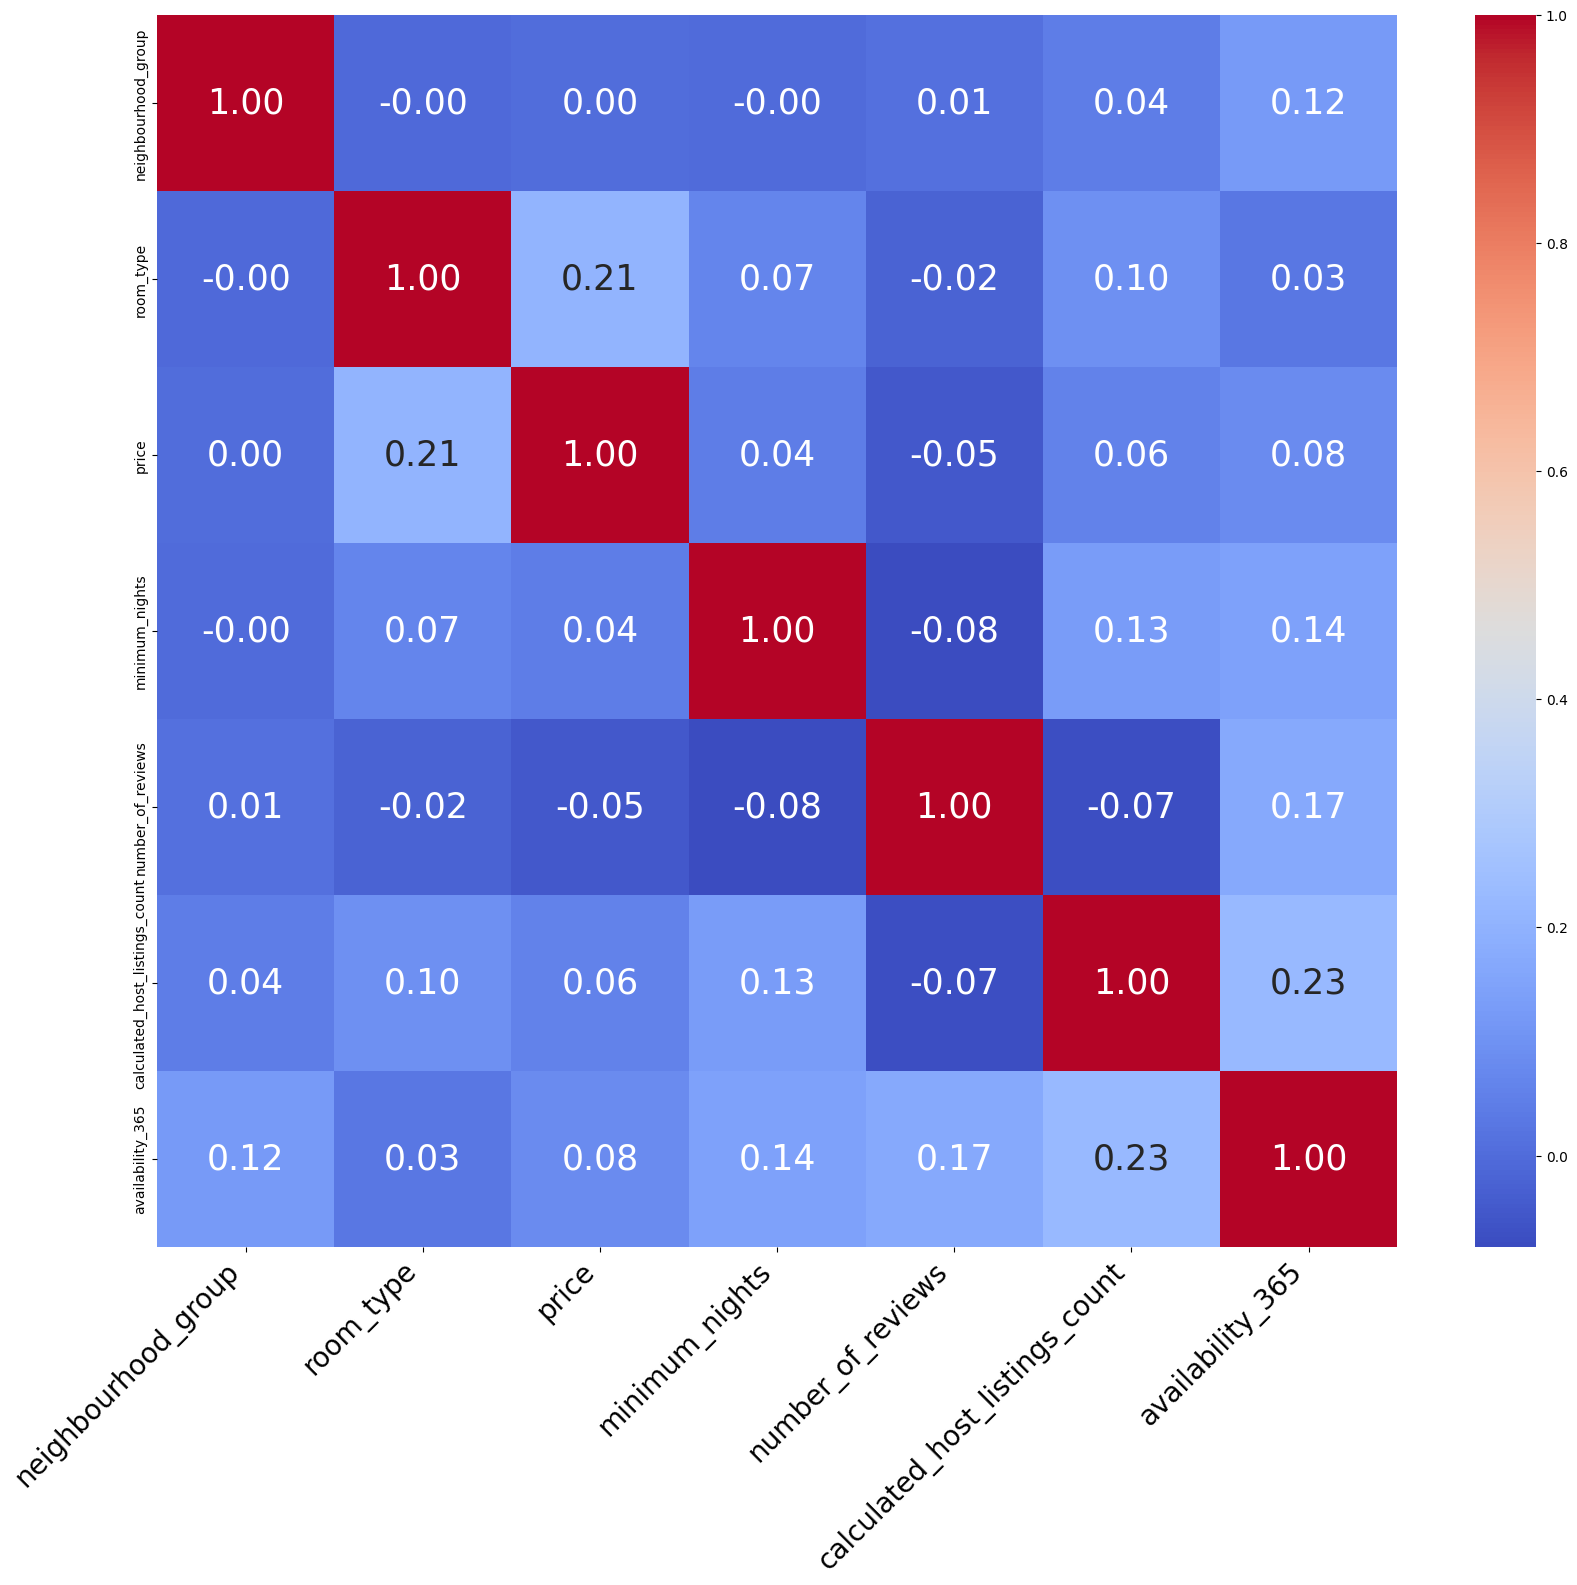

In [60]:
fig, axis = plt.subplots(figsize=(20, 16))

sns.heatmap(df_2[["neighbourhood_group", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 25})

axis.set_xticklabels(axis.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=20)
axis.set_yticklabels(axis.get_yticklabels(), fontsize=10)

In [70]:
#I want to make a graph of the correlation between the variables price and room_type as well as calculated_host_listings_count and availability_365

<Axes: xlabel='price', ylabel='room_type'>

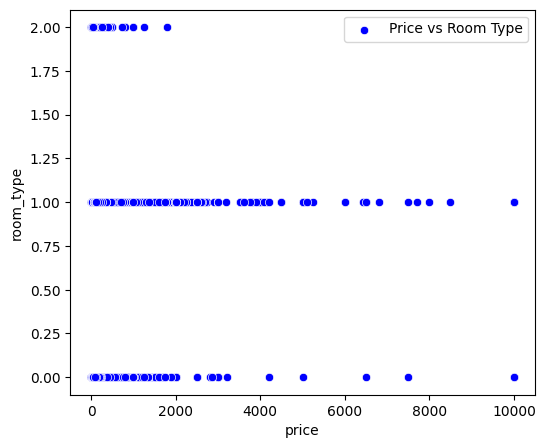

In [78]:
fig, axis = plt.subplots(figsize=(6, 5))
sns.scatterplot(x="price", y="room_type", data=df_2, color="blue", label="Price vs Room Type")

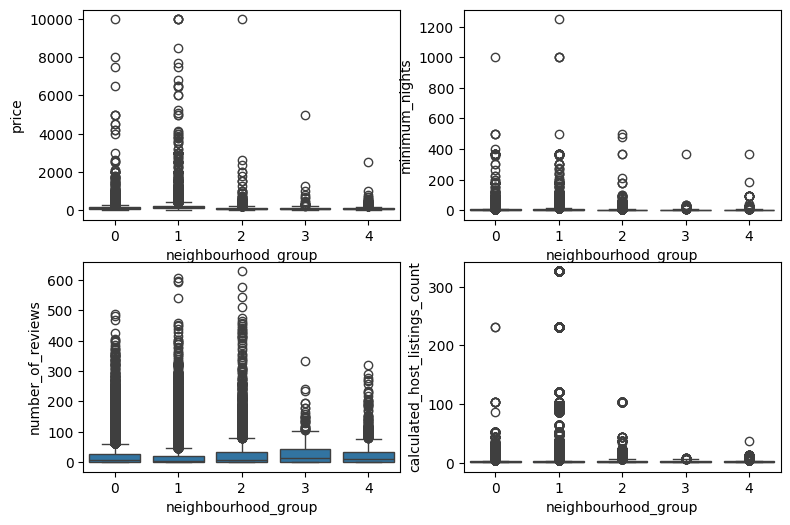

In [ ]:
#I want to make a boxplot of the neighbourhood_group and the other variables
fig, axis = plt.subplots(2, 2, figsize=(9, 6))
for i, variable in enumerate(["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]):
    sns.boxplot(x="neighbourhood_group", y=variable, data=df_2, ax=axis[i // 2, i % 2])


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

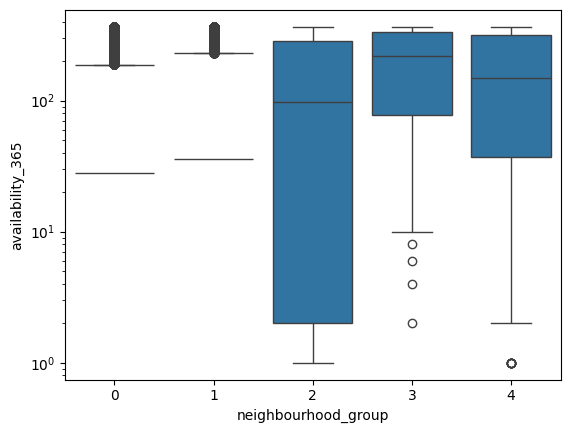

In [42]:
sns.boxplot(x="neighbourhood_group", y="availability_365", data=df_2, log_scale=True)

<Axes: xlabel='neighbourhood_group', ylabel='price'>

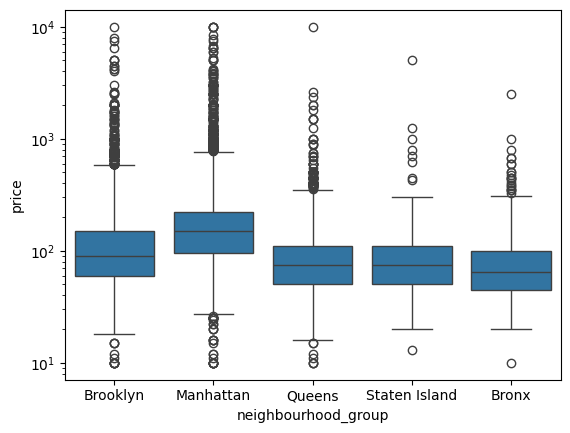

In [35]:
sns.boxplot(x="neighbourhood_group", y="price", data=df_2, log_scale=True)

<Axes: xlabel='room_type', ylabel='price'>

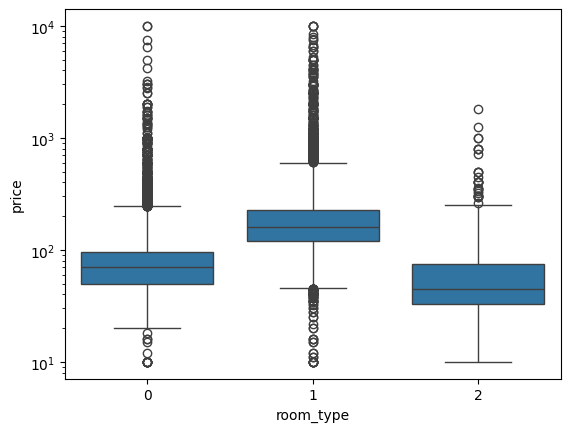

In [36]:
sns.boxplot(x="room_type", y="price", data=df_2, log_scale=True)

In [66]:
df_2.describe

<bound method NDFrame.describe of        neighbourhood_group  room_type  price  minimum_nights  \
0                        0          0    149               1   
1                        1          1    225               1   
2                        1          0    150               3   
3                        0          1     89               1   
4                        1          1     80              10   
...                    ...        ...    ...             ...   
48890                    0          0     70               2   
48891                    0          0     40               4   
48892                    1          1    115              10   
48893                    1          2     55               1   
48894                    1          0     90               7   

       number_of_reviews last_review  reviews_per_month  \
0                      9  2018-10-19               0.21   
1                     45  2019-05-21               0.38   
2                   

In [72]:
df_subset = df_2.groupby(df_2['room_type'])['price']
print(df_subset)

In [74]:
from scipy import stats

groups = [list(x) for _, x in df_subset]
result = stats.kruskal(*groups)
print(result)


print(groups)


KruskalResult(statistic=np.float64(22417.833022029412), pvalue=np.float64(0.0))
[[149, 150, 60, 79, 79, 85, 89, 85, 140, 130, 80, 110, 60, 80, 44, 50, 52, 55, 50, 70, 89, 35, 150, 68, 120, 135, 130, 80, 80, 110, 69, 49, 80, 55, 52, 80, 99, 51, 65, 105, 200, 70, 95, 150, 145, 94, 60, 50, 85, 65, 98, 89, 98, 60, 65, 101, 100, 59, 125, 99, 75, 90, 85, 70, 89, 50, 130, 77, 76, 135, 140, 80, 44, 156, 85, 125, 69, 69, 79, 250, 70, 70, 50, 40, 125, 110, 65, 99, 90, 120, 75, 130, 83, 123, 55, 80, 140, 200, 100, 45, 100, 71, 130, 69, 68, 64, 60, 135, 120, 92, 175, 80, 120, 36, 37, 37, 59, 36, 39, 60, 90, 70, 75, 60, 100, 70, 110, 60, 68, 75, 60, 75, 49, 95, 122, 109, 85, 125, 70, 90, 65, 59, 55, 69, 179, 150, 120, 71, 349, 349, 249, 100, 179, 95, 80, 165, 67, 50, 100, 599, 70, 60, 90, 95, 55, 85, 65, 290, 87, 99, 39, 85, 130, 50, 79, 96, 98, 95, 55, 42, 175, 75, 165, 75, 88, 80, 150, 42, 90, 89, 46, 140, 75, 33, 60, 75, 60, 65, 37, 85, 170, 115, 89, 91, 100, 120, 70, 75, 100, 99, 255, 110, 150,

In [62]:
res = stats.spearmanr(df_2['room_type'], df_2['price'], axis = 0, nan_policy='omit')
res

SignificanceResult(statistic=np.float64(0.5752251540303218), pvalue=np.float64(0.0))

In [75]:
df_subset_2 = df_2.groupby(df_2['neighbourhood_group'])['price']
print(df_subset_2)

In [76]:
from scipy import stats

groups_2 = [list(x) for _, x in df_subset_2]
result = stats.kruskal(*groups_2)
print(result)


print(groups)


KruskalResult(statistic=np.float64(7027.24083560648), pvalue=np.float64(0.0))
[[149, 150, 60, 79, 79, 85, 89, 85, 140, 130, 80, 110, 60, 80, 44, 50, 52, 55, 50, 70, 89, 35, 150, 68, 120, 135, 130, 80, 80, 110, 69, 49, 80, 55, 52, 80, 99, 51, 65, 105, 200, 70, 95, 150, 145, 94, 60, 50, 85, 65, 98, 89, 98, 60, 65, 101, 100, 59, 125, 99, 75, 90, 85, 70, 89, 50, 130, 77, 76, 135, 140, 80, 44, 156, 85, 125, 69, 69, 79, 250, 70, 70, 50, 40, 125, 110, 65, 99, 90, 120, 75, 130, 83, 123, 55, 80, 140, 200, 100, 45, 100, 71, 130, 69, 68, 64, 60, 135, 120, 92, 175, 80, 120, 36, 37, 37, 59, 36, 39, 60, 90, 70, 75, 60, 100, 70, 110, 60, 68, 75, 60, 75, 49, 95, 122, 109, 85, 125, 70, 90, 65, 59, 55, 69, 179, 150, 120, 71, 349, 349, 249, 100, 179, 95, 80, 165, 67, 50, 100, 599, 70, 60, 90, 95, 55, 85, 65, 290, 87, 99, 39, 85, 130, 50, 79, 96, 98, 95, 55, 42, 175, 75, 165, 75, 88, 80, 150, 42, 90, 89, 46, 140, 75, 33, 60, 75, 60, 65, 37, 85, 170, 115, 89, 91, 100, 120, 70, 75, 100, 99, 255, 110, 150, 6

In [63]:
stats.kruskal(df_2['neighbourhood_group'], df_2['price'])

KruskalResult(statistic=np.float64(74770.98299569021), pvalue=np.float64(0.0))

In [61]:
res = stats.spearmanr(df_2['neighbourhood_group'], df_2['price'], axis = 0, nan_policy='omit')
res

SignificanceResult(statistic=np.float64(0.06368359703685963), pvalue=np.float64(4.0304375581393746e-45))